In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Flatten , Dense

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(Xtrain , ytrain) , (Xtest , ytest ) = mnist.load_data()

In [5]:
Xtrain.shape , Xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
ytrain.shape , ytest.shape

((60000,), (10000,))

In [7]:
Xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
import matplotlib.pyplot as plt

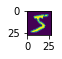

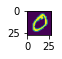

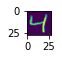

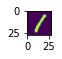

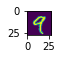

In [9]:
for i in range(5):
    plt.figure(figsize=(2,8))
    plt.subplot(6,4,1)
    plt.imshow(Xtrain[i])

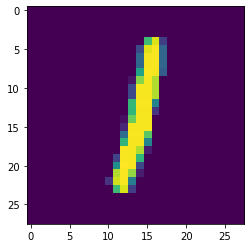

In [10]:
plt.imshow(Xtrain[6775])

In [11]:
Xtrain_s = Xtrain/255

In [12]:
Xtrain_s

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
Xtest_s = Xtest/255

In [14]:
model = Sequential()

In [15]:
model.add(Flatten(input_shape = (28,28)))

In [16]:
model.add(Dense(128,activation='relu'))

2022-04-26 22:32:35.567966: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-26 22:32:35.568378: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.add(Dense(128,activation='relu'))

In [18]:
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


###   metrics=['Accuracy'] ERROR

In [20]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['Accuracy']) 

In [21]:
model.fit(Xtrain, ytrain, epochs=10,validation_data=(Xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
   32/60000 [..............................] - ETA: 2:46

ValueError: Shapes (32, 10) and (32, 1) are incompatible

In [22]:
pre = model.predict(Xtest)

In [23]:
pre1 = np.argmax(pre,axis=1)

In [24]:
model1 = Sequential()

In [25]:
model1.add(Flatten(input_shape = (28,28)))

In [26]:
model1.add(Dense(128,activation='relu'))

In [27]:
model1.add(Dense(128,activation='relu'))

In [28]:
model1.add(Dense(10,activation='softmax'))

In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer="Adam" , metrics = ["accuracy"] ) 

In [31]:
model1.fit(Xtrain, ytrain, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 1.7293 - accuracy: 0.8716
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3352 - accuracy: 0.9281
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2409 - accuracy: 0.9417
Epoch 4/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1727 - accuracy: 0.9540
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1443 - accuracy: 0.9597
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1321 - accuracy: 0.9633
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1235 - accuracy: 0.9659
Epoch 8/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1115 - accuracy: 0.9691
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1035 - accuracy: 0.9724
Epoch

In [47]:
model2 = Sequential()
model2.add(Flatten(input_shape = (28,28)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ["accuracy"] ) 

In [51]:
model2.fit(Xtrain, ytrain)

Train on 60000 samples
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4000 - accuracy: 0.9185


In [52]:
model3 = Sequential()
model3.add(Flatten(input_shape = (28,28)))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(loss='sparse_categorical_crossentropy') 

In [54]:
model3.fit(Xtrain, ytrain)

Train on 60000 samples
60000/60000 [==============================] - 10s 162us/sample - loss: 1.9577


In [73]:
model4 = Sequential()
model4.add(Flatten(input_shape = (28,28)))
model4.add(Dense(90,activation='relu'))
model4.add(Dense(9,activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 9)                 7065      
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                100       
Total params: 7,255
Trainable params: 7,255
Non-trainable params: 0
_________________________________________________________________


In [74]:
model4.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ["accuracy"] ) 

In [75]:
model4.fit(Xtrain, ytrain)

Train on 60000 samples
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2095 - accuracy: 0.1995


In [64]:
pre1 = model4.predict(Xtest)

In [65]:
pre2 = np.argmax(pre1,axis=1)

In [71]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [72]:
pre2

array([7, 2, 1, ..., 4, 5, 6])